**WIND ENERGY**

**THE SKY IS THE LIMIT**

Renewable energy has become critical to our planet. 
Just think of CO2 emissions and depletion of non-renewable energy sources like oil. 

It’s estimated that by 2050 Solar and Wind energy may supply up to 2/3 of the world’s energy needs. 

Wind energy “will surge from today’s 7% to 26% in thirty years

From an economic perspective, wind power...estimated investments of over 5 trillion dollars..

https://www.enelgreenpower.com/media/news/d/2019/07/bloomberg-new-energy-outlook-2019

 This project addresses a significant dimension of the Wind Energy Universe.


THE PRIMARY COMPONENTS OF A WIND FARM:

1 - LOCATION

2 - PROPOSAL

3 - FINANCING

4- PURCHASE POWER AGREEMENT

THIS PROJECT IS A SUB-CATEGORY OF ITEMS ONE AND TWO

ITEMS THREE AND FOUR ARE BEYOND THE SCOPE OF THIS PROJECT

THIS PROJECT WILL BE OF SPECIAL INTEREST TO INDIVDUALS CONSIDERING AN INVESTMENT IN A WIND FARM 

AND COMMUNITES CONSIDERING ESTABLISHING THEIR OWN WIND FARM 



THE PRIMARY METRIC FOR ANY ENERGY SOURCE  --  WIND, SOLAR, HYDROELECTRIC, COAL ETC. IS ITS **ENERGY CONVERSION EFFICIENCY**

FOR WIND ENERGY THIS IS DEFINED AS THE **MEAN CAPACITY FACTOR**

Capacity factor:  The ratio of the electrical energy produced by a generating unit for the period of time considered to the electrical energy that could have been produced at continuous full power operation during the same period.

WHAT PERCENT OF THE MAXIMUM POWER RATING FOR EACH TURBINE THAT IS ACTUALLY REALIZED?

WE KNOW IT CAN NEVER BE 100% BECAUSE WIND IS INTERMITENT  -- IN BOTH INTENSITY AND DURATION


My primary source of data is The U.S. Wind Turbine Database

https://eerscmap.usgs.gov/uswtdb/data/U.S. 

They maintain detailed information on every wind turbine in the USA + Guam+ Puerto Rico – all **60,577** of them. 

Data includes GPS coordinates, turbine max capacity, date installed, turbine manufacturer, height etc.

 The only thing missing is the mean capacity factor for each turbine.

This can be calculated using Renewables.ninja

https://www.renewables.ninja/




FOR THIS PROJECT I WILL RANDOMLY SELECT 60 WIND TURBINES

30 IN NORTHEN CALIFORNIA  30 IN SOUTHERN CALIFORNIA

I WILL THEN COMPUTE THE MEAN CAPACITY FACTOR FOR EACH TURBINE

My hypothesis is that there is a statistically significant difference between mean aggregate capacity factor for the northern turbines and the mean aggregate capacity factor for the southern turbines. 

The null, of course, being that there is no difference.



In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ks_2samp
import seaborn as sns
import random
from google.colab import files
from IPython.display import Image

from IPython.display import Image
Image('windmill.old.jpg')
Image('Alta-wind-energy-sector.jpg')

In [0]:
# Source:
    # http://blog.nextgenetics.net/?e=102
    from IPython.display import HTML

    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

READ THE USGS WIND TURBINE DATASET THAT IDENTIFIES EVERY WIND TURBINE IN THE USA + PUERTO RICO + GUAM


In [0]:
wind=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/Thinkful/master/wind_data.csv')

TAKE A CLOSER LOOK AT OUR DATA

In [3]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60576 entries, 0 to 60575
Data columns (total 24 columns):
case_id       60576 non-null int64
faa_ors       53368 non-null object
faa_asn       53697 non-null object
usgs_pr_id    41397 non-null float64
t_state       60576 non-null object
t_county      60576 non-null object
t_fips        60576 non-null int64
p_name        60576 non-null object
p_year        60330 non-null float64
p_tnum        60576 non-null int64
p_cap         56530 non-null float64
t_manu        56366 non-null object
t_model       56227 non-null object
t_cap         56531 non-null float64
t_hh          54477 non-null float64
t_rd          55408 non-null float64
t_rsa         55408 non-null float64
t_ttlh        54477 non-null float64
t_conf_atr    60576 non-null int64
t_conf_loc    60576 non-null int64
t_img_date    38467 non-null object
t_img_srce    60576 non-null object
xlong         60576 non-null float64
ylat          60576 non-null float64
dtypes: float64(10), i

WE HAVE 60,576 ENTRIES AND 24 ATTRIBUTES


DROP 9 COLUMNS NOT RELEVANT TO THIS PROJECT

ADD "MEAN CAPACITY FACTOR COLUMN" -- A NUMBER I WILL CALCULATE

In [0]:
wind.drop(wind.columns[[1,2,3,16,17,18,19,20,21]],axis=1,inplace=True)
wind['Mean Capacity Factor']=0.0

In [5]:
wind.shape

(60576, 16)

RENAMES COLUMNS SO HUMANS CAN READ THEM

In [0]:
wind.columns=['CaseID','State','County','LocationID','Project Name', 'Year Built','Number of Turbines',"Max Project Capacity",'Turbine Manufacturer','Turbine Model','Max Turbine Capacity','Tower Hub Height','Rotor Diameter','Longitude','Latitude','Mean Capacity Factor']

In [7]:
wind.head()

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
0,3073403,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352219,35.088993,0.0
1,3001002,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.357185,35.086594,0.0
2,3005085,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.353485,35.085896,0.0
3,3073404,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352531,35.087852,0.0
4,3073401,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.354652,35.085163,0.0


In [8]:
wind.shape

(60576, 16)

CREATING PANDAS SUBSET  --  ONLY TURBINES IN CALIFORNIA ---COUNT IS  **8119**

In [0]:
wind_cali=wind[wind['State']=='CA']

In [10]:
wind_cali.shape

(8119, 16)

DROP ROWS WHERE  --> t_CAP=NaN

NO ENTRY FOR MAX CAPACITY

In [0]:
wind_cali = wind_cali.dropna(subset=['Max Turbine Capacity'])

In [0]:
wind_cali.shape

(6075, 16)

In [0]:
wind_cali.head(2)

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
0,3073403,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352219,35.088993,0.0
1,3001002,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.357185,35.086594,0.0


FIND MINIMUM LATITUDE FOR CALIFORNIA WIND TURBINES

In [12]:
wind_cali['Latitude'].min()

32.701496

FIND MAXIMUM LATITUDE FOR CALIFORNIA WIND TURBINES

In [13]:
wind_cali['Latitude'].max()

40.914696

/////////////////////////////////////////////////////////////////////////////////////////////

**SOUTHERN CALIFORNIA**

SELECT  TURBINES BETWEEN LATITUDE 32 AND 34  NORTH --  SOUTHERN CALIFORNIA

In [0]:
cali_south=wind_cali[(wind_cali['Latitude']>32) & (wind_cali['Latitude']<34)]

In [15]:
cali_south.shape

(2215, 16)

RANDOMLY SELECT 30 TURBINES FROM ABOVE SOUTHERN CALI SUBSET

In [0]:
cs=cali_south.sample(30,random_state=1)

TOTAL POWER CAPACITY FOR ALL SOUTHERN CALIFORNIA TURBINES IN MW

In [17]:
cs['Max Turbine Capacity'].sum()

14648.0

In [0]:
cs_sub=cs[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor']]

COMPUTE MEAN CAPACITY FACTOR FOR EACH TURBINE USING RENEWABLES.NINJA

In [0]:
cs.at[24740,'Mean Capacity Factor']=16.1
cs.at[36806,'Mean Capacity Factor']=21.5
cs.at[36885,'Mean Capacity Factor']=12.7
cs.at[31899,'Mean Capacity Factor']=12.7
cs.at[31928,'Mean Capacity Factor']=12.7
cs.at[771,'Mean Capacity Factor']=10.2
cs.at[31697,'Mean Capacity Factor']=16.1
cs.at[826,'Mean Capacity Factor']=9.23
cs.at[31884,'Mean Capacity Factor']=12.7
cs.at[44514,'Mean Capacity Factor']=14.4
cs.at[44431,'Mean Capacity Factor']=13.1
cs.at[13638,'Mean Capacity Factor']=17.2
cs.at[33343,'Mean Capacity Factor']=13.2
cs.at[44519,'Mean Capacity Factor']=18.3
cs.at[44428,'Mean Capacity Factor']=14.2
cs.at[55048,'Mean Capacity Factor']=16.2 #assigned section mean  37.7
cs.at[36845,'Mean Capacity Factor']=18.4
cs.at[33408,'Mean Capacity Factor']=14.8
cs.at[35882,'Mean Capacity Factor']=25.6
cs.at[36809,'Mean Capacity Factor']=13.5
cs.at[33402,'Mean Capacity Factor']=13.6
cs.at[44530,'Mean Capacity Factor']=15.9
cs.at[33425,'Mean Capacity Factor']=15.5
cs.at[33301,'Mean Capacity Factor']=17.3
cs.at[33399,'Mean Capacity Factor']=16.1
cs.at[44534,'Mean Capacity Factor']=15.9
cs.at[33310,'Mean Capacity Factor']=13.6
cs.at[31894,'Mean Capacity Factor']=13.8
cs.at[52153,'Mean Capacity Factor']=25.9
cs.at[44441,'Mean Capacity Factor']=14.2

DISPLAY DETAILS FOR ALL 30 RANDOMLY SELECTED TURBINES

In [20]:
cs

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
24740,3006356,CA,Riverside County,6065,Karen Avenue Windfarm,2004.0,12,11.700,GE Wind,1.5-70.5,1500.0,56.5,77.0,-116.555290,33.921993,16.10
36806,3067710,CA,Riverside County,6065,Painted Hills,1985.0,169,15.210,Vestas - American Wind Technology Inc.,V17,90.0,NaN,17.0,-116.631630,33.935703,21.50
36885,3067760,CA,Riverside County,6065,Painted Hills,1985.0,59,3.835,Vestas - American Wind Technology Inc.,V15,65.0,NaN,15.0,-116.618141,33.937469,12.70
31899,3002834,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.661087,33.960297,12.70
31928,3003352,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658691,33.954594,12.70
771,3000119,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.660759,33.942959,10.20
31697,3004362,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658806,33.955647,16.10
826,3008467,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.666092,33.945309,9.23
31884,3009485,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.652290,33.953796,12.70
44514,3008744,CA,Riverside County,6065,San Gorgonio Westwinds II LLC,1999.0,48,33.600,NEG Micon,NM48,700.0,50.0,48.0,-116.588890,33.895195,14.40


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**NORTHERN CALIFORNIA**



SELECTING TURBINES BETWEEN LATITUDE 37 AND 40.92     --   NORTHERN CALIFORNIA

In [0]:
cali_north=wind_cali[(wind_cali['Latitude']>37) & (wind_cali['Latitude']<40.92)]

In [22]:
cali_north.shape

(1191, 16)

RANDOMLY SELECT 30 TURBINES FROM NORTHERN CALI SUBSET

In [0]:
cn=cali_north.sample(30,random_state=1)

///////////////////////////////////////////////////////////////////////////////////////////////

In [24]:
cn['Max Turbine Capacity'].sum()

41585.0

In [0]:
cn.at[13366,'Mean Capacity Factor']=30.1
cn.at[45928,'Mean Capacity Factor']=39.9
cn.at[23633,'Mean Capacity Factor']=23.2
cn.at[46170,'Mean Capacity Factor']=36.3
cn.at[45958,'Mean Capacity Factor']=40.5
cn.at[33053,'Mean Capacity Factor']=17.8
cn.at[21699,'Mean Capacity Factor']=12.6
cn.at[47069,'Mean Capacity Factor']=39.3
cn.at[33079,'Mean Capacity Factor']=36.4
cn.at[21650,'Mean Capacity Factor']=17.5
cn.at[14250,'Mean Capacity Factor']=34.2
cn.at[21724,'Mean Capacity Factor']=34.4
cn.at[46062,'Mean Capacity Factor']=40.1
cn.at[45984,'Mean Capacity Factor']=40.5
cn.at[46194,'Mean Capacity Factor']=34.5
cn.at[46124,'Mean Capacity Factor']=34.5
cn.at[18066,'Mean Capacity Factor']=31.3  #assigned section mean was 47.8
cn.at[38010,'Mean Capacity Factor']=30.0
cn.at[47087,'Mean Capacity Factor']=14.9
cn.at[47072,'Mean Capacity Factor']=30.4
cn.at[23632,'Mean Capacity Factor']=24.4
cn.at[23625,'Mean Capacity Factor']=24.5
cn.at[23645,'Mean Capacity Factor']=24.5
cn.at[46157,'Mean Capacity Factor']=33.2
cn.at[45966,'Mean Capacity Factor']=40.7
cn.at[18024,'Mean Capacity Factor']=47.9
cn.at[38091,'Mean Capacity Factor']=30.0
cn.at[21686,'Mean Capacity Factor']=35.3
cn.at[18077,'Mean Capacity Factor']=36.1
cn.at[38136,'Mean Capacity Factor']=30.2

DISPLAY DETAILS FOR ALL 30 RANDOMLY SELECTED NORTHERN CAL TURBINES

In [26]:
cn

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
13366,3020543,CA,Alameda County,6001,Diablo Winds,2004.0,31,20.460,Vestas,V47-0.66,660.0,60.0,47.0,-121.625084,37.745895,30.1
45928,3028682,CA,Solano County,6095,Shiloh II,2009.0,33,66.000,REpower,MM92,2000.0,68.5,92.5,-121.840691,38.173996,39.9
23633,3004156,CA,Merced County,6047,International Turbine Research Center,1988.0,161,17.430,NaN,NaN,105.0,NaN,NaN,-121.194290,37.046196,23.2
46170,3016948,CA,Solano County,6095,Shiloh Wind Project,2006.0,76,114.000,GE Wind,GE1.5-77,1500.0,80.0,77.0,-121.827583,38.162395,36.3
45958,3028700,CA,Solano County,6095,Shiloh II,2009.0,42,84.000,REpower,MM92,2000.0,80.0,92.5,-121.769989,38.163994,40.5
33053,3036696,CA,Solano County,6095,Montezuma,2010.0,16,36.800,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.792885,38.152195,17.8
21699,3071498,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.801735,38.100502,12.6
47069,3025436,CA,Solano County,6095,Solano Wind Project,2007.0,21,63.000,Vestas,V90-3.0,3000.0,80.0,90.0,-121.760490,38.108395,39.3
33079,3040370,CA,Solano County,6095,Montezuma Winds II,2012.0,34,78.200,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.809586,38.116894,36.4
21650,3011420,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.789688,38.142094,17.5


**STATISTICAL ANALYSIS**

HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN NORTHERN CALIFORNIA SELECTION

(array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 3.,
        0., 0., 0., 0., 0., 0., 0., 4., 1., 1., 0., 0., 1., 2., 2., 1., 3.,
        0., 0., 0., 1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([12.6  , 13.306, 14.012, 14.718, 15.424, 16.13 , 16.836, 17.542,
        18.248, 18.954, 19.66 , 20.366, 21.072, 21.778, 22.484, 23.19 ,
        23.896, 24.602, 25.308, 26.014, 26.72 , 27.426, 28.132, 28.838,
        29.544, 30.25 , 30.956, 31.662, 32.368, 33.074, 33.78 , 34.486,
        35.192, 35.898, 36.604, 37.31 , 38.016, 38.722, 39.428, 40.134,
        40.84 , 41.546, 42.252, 42.958, 43.664, 44.37 , 45.076, 45.782,
        46.488, 47.194, 47.9  ]),
 <a list of 50 Patch objects>)

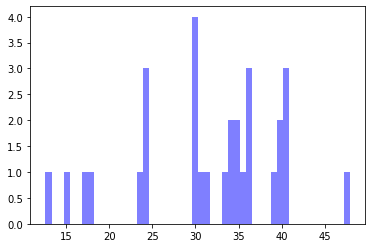

In [27]:
plt.hist(cn['Mean Capacity Factor'], alpha = .5,color='b',bins=50)

HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN SOUTHERN CALIFORNIA SELECTION

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 4., 2., 1., 3., 2., 1., 1.,
        0., 1., 0., 6., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 9.23  ,  9.5634,  9.8968, 10.2302, 10.5636, 10.897 , 11.2304,
        11.5638, 11.8972, 12.2306, 12.564 , 12.8974, 13.2308, 13.5642,
        13.8976, 14.231 , 14.5644, 14.8978, 15.2312, 15.5646, 15.898 ,
        16.2314, 16.5648, 16.8982, 17.2316, 17.565 , 17.8984, 18.2318,
        18.5652, 18.8986, 19.232 , 19.5654, 19.8988, 20.2322, 20.5656,
        20.899 , 21.2324, 21.5658, 21.8992, 22.2326, 22.566 , 22.8994,
        23.2328, 23.5662, 23.8996, 24.233 , 24.5664, 24.8998, 25.2332,
        25.5666, 25.9   ]),
 <a list of 50 Patch objects>)

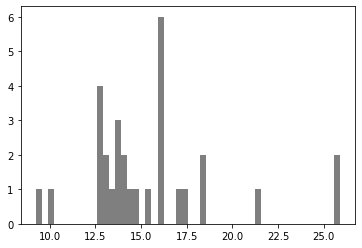

In [28]:
plt.hist(cs['Mean Capacity Factor'], alpha = .5,color='k',bins=50)

Based on skew and kurtosis northern California  data is normally distributed

In [29]:
stats.describe(cn['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(12.6, 47.9), mean=31.506666666666668, variance=71.83995402298851, skewness=-0.5458615099517913, kurtosis=-0.24654180294961048)

Based on skew and kurtosis southern California data is not normally distributed

In [0]:
stats.describe(cs['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(9.23, 25.9), mean=15.487666666666666, variance=13.77373574712644, skewness=1.3051517151406484, kurtosis=1.9536340279259656)

APPLY SHAPIRO-WILKES TEST TO NORTHERN CALIFORNIA MEAN CAPACITY FACTORS -->NORMAL DISTRIBUTION

In [0]:
 stats.shapiro(cn['Mean Capacity Factor'])

(0.94923996925354, 0.1613122522830963)

APPLY SHAPIRO-WILKES TEST TO SOTHERN  CALIFORNIA MEAN CAPACITY FACTORS  --> NOT NORMAL DISTRIBUTION

In [30]:
stats.shapiro(cs['Mean Capacity Factor'])

(0.8710892200469971, 0.001771549228578806)

SINCE BOTH DATA SETS DO NOT COME FROM NORMAL DISTRIBUTIONS -- APPLY SEVERAL NONPARAMETRIC TESTS 

THE RESULT OF EVERY nonparametric TEST TELLS US TO REJECT THE NULL

The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.


The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.


The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

Mood's median test is a special case of Pearson's chi-squared test. 

It is a nonparametric test that tests the null hypothesis that the medians of the populations from which two or more samples are drawn are identical.

APPLY KOLMOGOROV–SMIRNOV TEST

In [31]:
ks_2samp(cn['Mean Capacity Factor'],cs['Mean Capacity Factor'])

Ks_2sampResult(statistic=0.8, pvalue=8.466416460035895e-10)

APPLY MOODY'S MEDIAN TEST

In [0]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(cs['Mean Capacity Factor'],cn['Mean Capacity Factor'])

In [33]:
p

5.887764274517283e-08

APPLY MANN-WHITNEY U TEST

In [34]:
from scipy.stats import mannwhitneyu
mannwhitneyu(cs['Mean Capacity Factor'],cn['Mean Capacity Factor'])

MannwhitneyuResult(statistic=60.0, pvalue=4.200356145410573e-09)

CORRELATION

NORTHERN CAL

In [35]:
cn_sub=cn[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor','Rotor Diameter']]
cn_sub.corr()

,Max Turbine Capacity,Tower Hub Height,Mean Capacity Factor,Rotor Diameter
Max Turbine Capacity,1.000000,0.827288,0.363551,0.907286
Tower Hub Height,0.827288,1.000000,0.349623,0.905541
Mean Capacity Factor,0.363551,0.349623,1.000000,0.293995
Rotor Diameter,0.907286,0.905541,0.293995,1.000000


In [0]:
#g = sns.PairGrid(cn)
#g = g.map(plt.scatter)

SOUTHERN CAL

In [36]:
cs_sub=cs[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor','Rotor Diameter']]
cs_sub.corr()

,Max Turbine Capacity,Tower Hub Height,Mean Capacity Factor,Rotor Diameter
Max Turbine Capacity,1.000000,0.896134,0.648554,0.987290
Tower Hub Height,0.896134,1.000000,0.744164,0.934670
Mean Capacity Factor,0.648554,0.744164,1.000000,0.624165
Rotor Diameter,0.987290,0.934670,0.624165,1.000000


////////////////////////////////////////////////////////////////////////////////////////////////

GRAPH OF SPREAD AND RELATIONSHIP BEWEEN NORTHERN CAL MEAN CAPACITY FACTOR AND SOUTHERN CAL TOWER HUB HEIGHT

THE MEAN CAPACITY FACTOR IS PRIMARILY DEPENDENT ON TOWER HUB HEIGHT -- NOT TURBINE MAX CAPACITY

THIS TELLS US THAT THE SKY IS THE LIMIT -- HIGHER TOWER HUB HEIGHT MEANS GREATER MEAN CAPACITY FACTOR

THIS IS THE TAKEAWAY FROM THIS PROJECT




=========================================================================================


**GRAPHS**

CREATE A NEW COLUMN  TO AID IN VISUALIZATION

In [0]:
cn_north=cn
#cn_north.drop(['compass='],axis=1,inplace=True)
cn_north['section']='North'
#cn_north.head()
#cn_north.shape
#list(cn_north)

In [0]:
cs_south=cs
cs_south['section']='South'
cs_south.head()
cs_south.shape

In [0]:
cs_con=cs_south.append(cn_north, sort=False)

GRAPH OF MEANS AND 95% CI BEWEEN NORTHERN CAL AND SOUTH CAL TOWER HUB HEIGHT

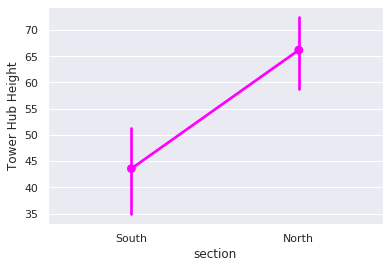

In [0]:
sns.set(style="darkgrid")
ax = sns.pointplot(x="section", y="Tower Hub Height", data=cs_con,color='magenta')

GRAPH OF MEANS AND 95% CI BEWEEN NORTHERN CAL MEAN CAPACITY FACTOR AND SOUTHERN CAL MAX TURBINE CAPACITY

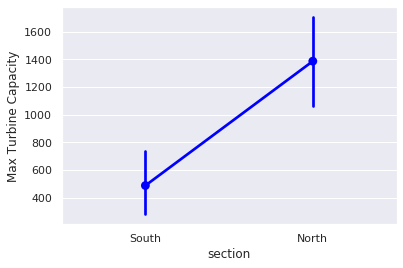

In [0]:
sns.set(style="darkgrid")
ax = sns.pointplot(y="Max Turbine Capacity", x="section", data=cs_con,color='blue')


GRAPH OF MEANS AND 95% CI  MEAN CAPACITY FACTOR  ROTOR DIAMETER

/usr/local/lib/python3.6/dist-packages/seaborn/palettes.py:246: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  palette = _ColorPalette(palette)


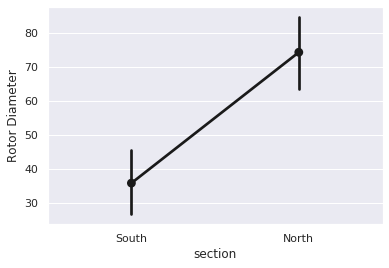

In [0]:
sns.set(style="darkgrid")
ax = sns.pointplot(y="Rotor Diameter", x="section", data=cs_con,color='K')

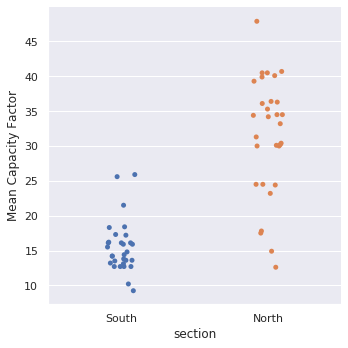

In [0]:
sns.catplot(x="section",y="Mean Capacity Factor",data=cs_con)

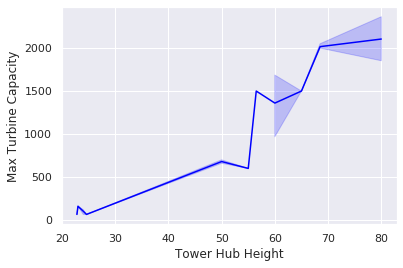

In [0]:
sns.set(style="darkgrid")
ax = sns.lineplot(x="Tower Hub Height", y="Max Turbine Capacity", data=cs_con,color='blue')

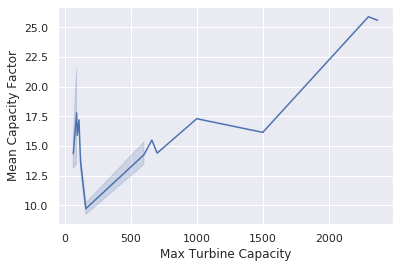

In [0]:
sns.lineplot(x=cs["Max Turbine Capacity"],y=cs['Mean Capacity Factor'])

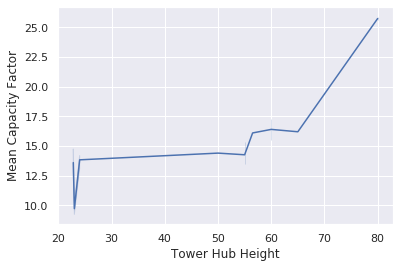

In [0]:
sns.lineplot(y=cs['Mean Capacity Factor'],x=cs['Tower Hub Height'])

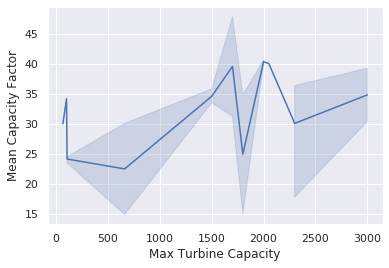

In [0]:
sns.lineplot(x=cn["Max Turbine Capacity"],y=cn['Mean Capacity Factor'])

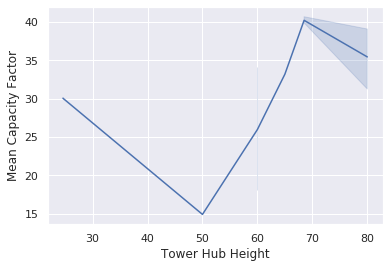

In [0]:
sns.lineplot(y=cn['Mean Capacity Factor'],x=cn['Tower Hub Height'])

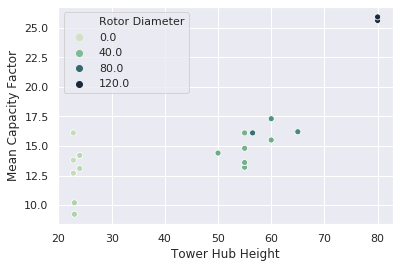

In [0]:

#Draws a scatter plot with the possibility of several semantic groupings. 
import seaborn as sns  
sns.set()  
  
# Load the example iris dataset  
planets = sns.load_dataset("planets")  
  
cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)  
ax = sns.scatterplot(y=cs['Mean Capacity Factor'], x=cs['Tower Hub Height'],  
                      hue=cs['Rotor Diameter'],  
                     palette=cmap, sizes=(100, 100),  
                     data=cs)  

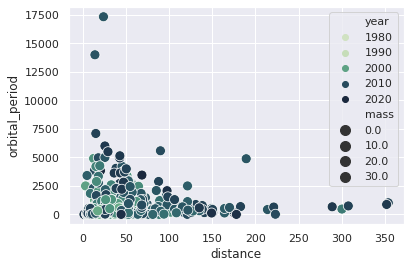

In [0]:

#Draws a scatter plot with the possibility of several semantic groupings. 
import seaborn as sns  
sns.set()  
  
# Load the example iris dataset  
#planets = sns.load_dataset("planets")  
  
cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)  
ax = sns.scatterplot(x="distance", y="orbital_period",  
                     hue="year", size="mass",  
                     palette=cmap, sizes=(100, 100),  
                     data=planets)  

====================================================================================


**STATISTICS FOR ENTIRE DATABASE**

MAX INDIVIDUAL TURBINE CAPACITY BY YEAR FOR ENTIRE DATABASE

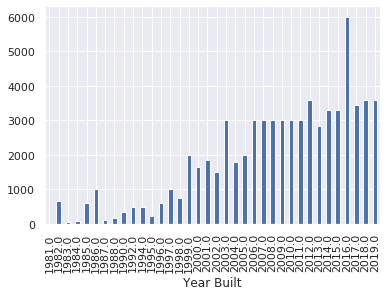

In [0]:
m=wind.groupby("Year Built")['Max Turbine Capacity'].max()
m.plot.bar()

MEAN TURBINE CAPACITY BY YEAR FOR ENTIRE DATABASE



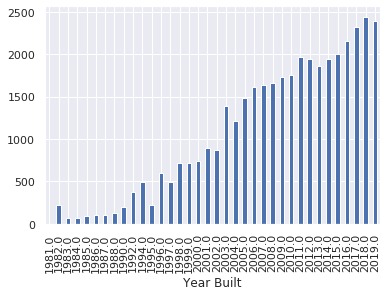

In [0]:
m=wind.groupby("Year Built")['Max Turbine Capacity'].mean()
m.plot.bar()

MAX INDIVIDUAL TURBINE HUB HEIGHT BY YEAR FOR ENTIRE DATABASE

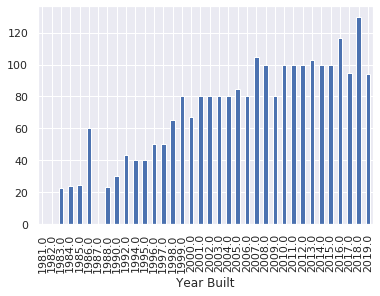

In [0]:
h=wind.groupby("Year Built")['Tower Hub Height'].max()
h.plot.bar()

MEAN TURBINE HUB HEIGHT BY YEAR FOR ENTIRE DATABASE

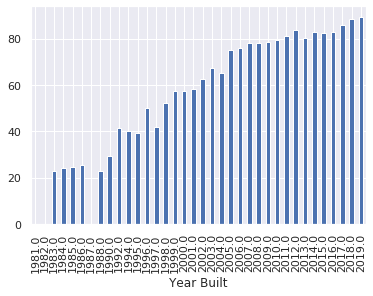

In [0]:
h=wind.groupby("Year Built")['Tower Hub Height'].mean()
h.plot.bar()


HISTOGRAM OF MAX POWER FOR ALL 60,576 TURBINES

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.8250e+03, 4.7660e+03, 2.3791e+04, 1.8451e+04, 4.2540e+03,
        1.4390e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([  50.,  645., 1240., 1835., 2430., 3025., 3620., 4215., 4810.,
        5405., 6000.]),
 <a list of 10 Patch objects>)

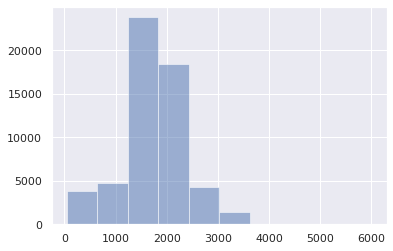

In [0]:
plt.hist(wind['Max Turbine Capacity'], alpha = .5,color='b')

WEAKNESSES

WORKING WITH THIS EXTREMELY SMALL SAMPLE SIZE MAY LEAD ONE TO QUESTION THE LEAP FROM SAMPLE TO POPULATION

USING ONLY ONE DRAW FROM EACH SECTION LIMITS ACCURACY

A SIGNIFICANT IMPROBVEMENT WOULD BE REALIZED IF WE COMPUTED THE MEAN CAPACITY FACOR FOR ALL 60,507 TURBINES IN THE DATABASE -- THEN WE WOULD NOT NEED TO SAMPLE
